Load Libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as py
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn import tree

Load the dataset

In [2]:
x,y=load_breast_cancer(return_X_y=True)

Convert the array into Dataframe

In [3]:
X=pd.DataFrame(x)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
Y=pd.DataFrame(y)
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


Check the dimensions of the dataset

In [5]:
X.shape

(569, 30)

In [6]:
Y.shape

(569, 1)

Perform splitting

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Fit the model on the training dataset

In [8]:
df_model=DecisionTreeClassifier(random_state=0)
df_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

Perform prediction on test dataset

In [9]:
prediction=df_model.predict(x_test)

Calculate the accuracy of the model

In [10]:
print("Accuracy:-", accuracy_score(y_test,prediction))

Accuracy:- 0.9122807017543859


Visualize final decision tree

[Text(713.1336206896552, 516.4200000000001, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(541.1637931034484, 462.06000000000006, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(428.12068965517244, 407.70000000000005, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(317.4827586206897, 353.34000000000003, 'X[29] <= 0.055\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(279.0, 298.98, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(355.96551724137936, 298.98, 'X[6] <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(250.1379310344828, 244.62, 'X[13] <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(153.93103448275863, 190.26000000000005, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(76.96551724137932, 135.90000000000003, 'X[1] <= 19.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(38.48275862068966, 81.54000000000002, 'gini = 0.0\nsamples = 5\

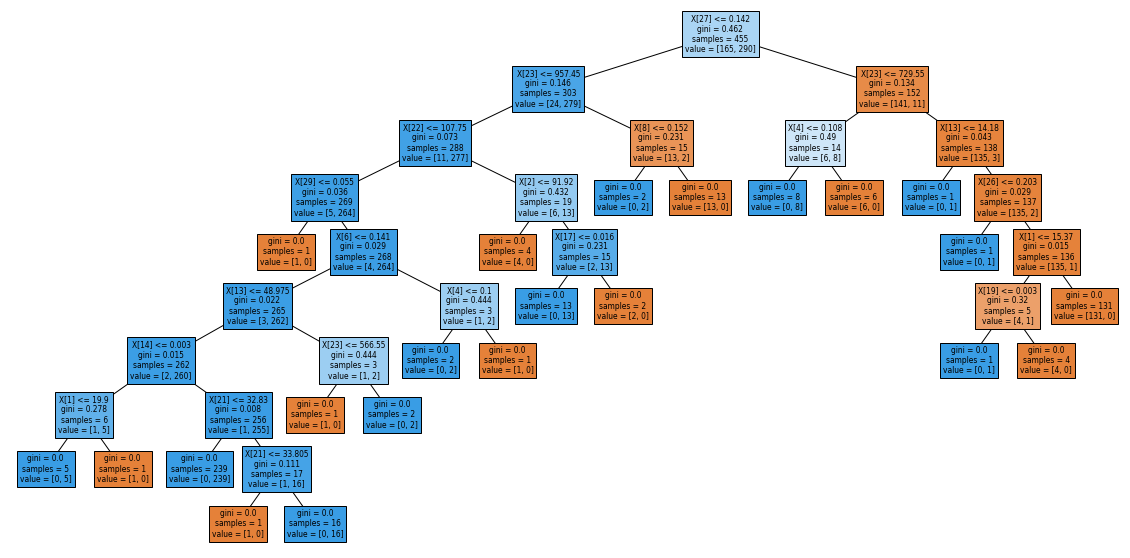

In [11]:
py.figure(figsize=(20,10))
tree.plot_tree(df_model,filled=True)

Perform cost complexity pruning 

In [12]:
path=df_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [13]:
ccp_alphas

array([0.        , 0.002165  , 0.00218164, 0.00424952, 0.00426843,
       0.00761905, 0.00761905, 0.00865816, 0.01507064, 0.01688173,
       0.04301457, 0.32027199])

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

Visualize the accuracy of training and testing dataset for different values of ccp_alpha

<Figure size 720x720 with 0 Axes>

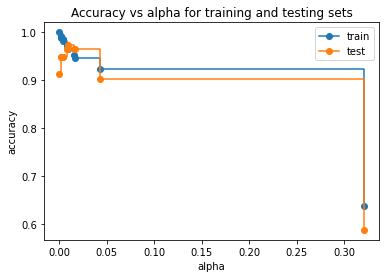

In [15]:
py.figure(figsize=(10,10))
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]
fig, ax = py.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
py.show()

# In above graph, when the value of ccp_alpha value=0.01 it is showing good trade-off between the accuracy of the model on training and testing dataset. So, initialize the ccp_alpha value equal to 0.01 and train it again over the training dataset.

Fit the model again on training dataset

In [16]:
new_df_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
new_df_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

Perform prediction on test dataset

In [17]:
new_prediction=new_df_model.predict(x_test)

Check the accuracy of the model

In [18]:
print("Accuracy:-",accuracy_score(y_test,new_prediction))

Accuracy:- 0.9736842105263158


Visualize pruned decision tree

[Text(279.0, 475.65000000000003, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(139.5, 339.75, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(69.75, 203.85000000000002, 'gini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(209.25, 203.85000000000002, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(418.5, 339.75, 'X[23] <= 729.55\ngini = 0.134\nsamples = 152\nvalue = [141, 11]'),
 Text(348.75, 203.85000000000002, 'X[4] <= 0.108\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(279.0, 67.94999999999999, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(488.25, 203.85000000000002, 'gini = 0.043\nsamples = 138\nvalue = [135, 3]')]

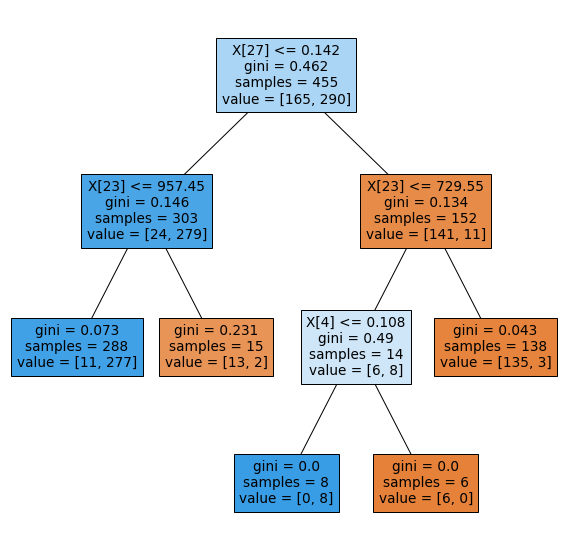

In [19]:
py.figure(figsize=(10,10))
tree.plot_tree(new_df_model,filled=True)